## 📊 Project: Funnel Drop-off & Behavioral Segmentation Analysis

### 🧠 Objective:
This project simulates a user funnel and retention dataset for a mobile app. The primary goals are:
- To analyze user drop-offs across different stages of the funnel
- To identify patterns between retained and churned users
- To segment users based on behavior for actionable insights

### 📁 Step 1: Data Generation (Simulated)
To simulate realistic user behavior in a mobile app, we generate a dataset of 5,000 users with the following characteristics:

- Users go through an onboarding funnel: `Signup -> Tutorial -> Profile Setup -> First Action -> Retention`
- Drop-off rates are not uniform. For instance:
  - ~85% complete the tutorial
  - ~75% set up a profile
  - ~60% perform a meaningful in-app action
  - ~40% are retained after 14 days
- Retained users tend to be more active: more daily sessions and longer time spent per session
- Additional attributes like `country` and `device_type` add segmentation richness

The dataset will be used for funnel analysis, retention breakdown, and behavioral clustering in the next steps.


In [46]:
import pandas as pd
import numpy as np
import random
from datetime import timedelta, datetime

np.random.seed(42)

# Number of users
n_users = 5000

# Generate user IDs
user_ids = np.arange(1, n_users + 1)

# Random signup dates (last 2 months)
start_date = datetime.strptime("2024-03-01", "%Y-%m-%d")
signup_dates = [start_date + timedelta(days=int(np.random.rand()*60)) for _ in range(n_users)]

# Tutorial completion (85%)
tutorial_completed = np.random.choice([1, 0], size=n_users, p=[0.85, 0.15])

# Profile setup (given tutorial completed: 75%, else 20%)
profile_setup = [np.random.choice([1, 0], p=[0.75, 0.25]) if t==1 else np.random.choice([1, 0], p=[0.2, 0.8]) for t in tutorial_completed]

# First action (given profile setup: 80%, else 30%)
first_action = [np.random.choice([1, 0], p=[0.8, 0.2]) if p==1 else np.random.choice([1, 0], p=[0.3, 0.7]) for p in profile_setup]

# Retention (given first action: 60%, else 15%)
retention_14d = [np.random.choice([1, 0], p=[0.6, 0.4]) if a==1 else np.random.choice([1, 0], p=[0.15, 0.85]) for a in first_action]

# Daily active days (only for retained users)
daily_active_days = [np.random.randint(8, 15) if r==1 else np.random.randint(0, 8) for r in retention_14d]

# Avg session time (retained users spend more time)
avg_session_time = [round(np.random.normal(5, 1.5), 2) if r==1 else round(np.random.normal(2.5, 1), 2) for r in retention_14d]

# Country & device
countries = ['IT', 'DE', 'FR', 'ES', 'PL']
country = [random.choice(countries) for _ in range(n_users)]
device_type = [random.choice(['iOS', 'Android']) for _ in range(n_users)]

# Create DataFrame
df = pd.DataFrame({
    'user_id': user_ids,
    'signup_date': signup_dates,
    'tutorial_completed': tutorial_completed,
    'profile_setup': profile_setup,
    'first_action_done': first_action,
    'retention_14d': retention_14d,
    'daily_active_days': daily_active_days,
    'avg_session_time': avg_session_time,
    'country': country,
    'device_type': device_type
})

df.head()


,user_id,signup_date,tutorial_completed,profile_setup,first_action_done,retention_14d,daily_active_days,avg_session_time,country,device_type
0,1,2024-03-23,1,1,1,0,1,2.50,DE,Android
1,2,2024-04-27,1,1,1,1,9,2.45,IT,iOS
2,3,2024-04-13,0,1,1,1,8,4.26,IT,Android
3,4,2024-04-05,1,1,1,0,6,3.46,DE,Android
4,5,2024-03-10,0,0,1,1,10,3.26,PL,Android


## 🔍 Step 2: Funnel Drop-off Analysis

### 🎯 Goal:
To analyze how users progress through key onboarding stages in the app and where significant drop-offs occur.

### 🧪 Method:
- Calculate the conversion rate at each funnel stage: from signup to 14-day retention
- Visualize drop-offs between funnel steps to uncover areas of improvement
- Identify which steps are bottlenecks and how many users we lose at each one

This analysis mimics the real challenges product teams face when optimizing onboarding flows.


In [47]:
# Funnel conversion rates
total_users = len(df)
tutorial_rate = df['tutorial_completed'].mean()
profile_rate = df['profile_setup'].mean()
first_action_rate = df['first_action_done'].mean()
retention_rate = df['retention_14d'].mean()

print("Funnel Conversion Rates:")
print(f"Tutorial Completed: {tutorial_rate:.2%}")
print(f"Profile Setup: {profile_rate:.2%}")
print(f"First Action Done: {first_action_rate:.2%}")
print(f"Retained after 14 days: {retention_rate:.2%}")


Funnel Conversion Rates:
Tutorial Completed: 85.64%
Profile Setup: 66.02%
First Action Done: 62.38%
Retained after 14 days: 41.44%


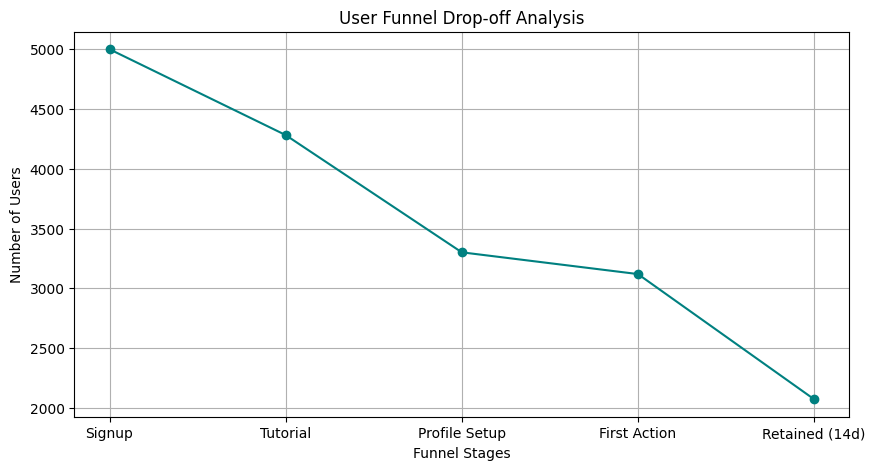

In [48]:
import matplotlib.pyplot as plt

stages = ['Signup', 'Tutorial', 'Profile Setup', 'First Action', 'Retained (14d)']
counts = [
    total_users,
    df['tutorial_completed'].sum(),
    df['profile_setup'].sum(),
    df['first_action_done'].sum(),
    df['retention_14d'].sum()
]

plt.figure(figsize=(10, 5))
plt.plot(stages, counts, marker='o', linestyle='-', color='teal')
plt.title("User Funnel Drop-off Analysis")
plt.xlabel("Funnel Stages")
plt.ylabel("Number of Users")
plt.grid(True)
plt.show()


### 🔧 Data Realism Enhancements

To make our simulated retention dataset more reflective of real-world trends, we introduce targeted variability:
- **Country-Specific Trends**: Italy is assumed to have higher user engagement, while Spain shows slightly weaker retention patterns.
- **Device Influence**: iOS users are presumed to enjoy a smoother user experience, contributing to marginally higher retention rates.

This enhancement avoids perfectly balanced splits and supports more nuanced, realistic model behavior.


In [49]:
# Country-specific retention adjustment
df.loc[(df['country'] == 'IT') & (df['retention_14d'] == 0) & (np.random.rand(len(df)) < 0.3), 'retention_14d'] = 1
df.loc[(df['country'] == 'ES') & (df['retention_14d'] == 1) & (np.random.rand(len(df)) < 0.3), 'retention_14d'] = 0

# iOS users are more likely to be retained
df.loc[(df['device_type'] == 'iOS') & (df['retention_14d'] == 0) & (np.random.rand(len(df)) < 0.25), 'retention_14d'] = 1


## 📌 Step 3: Behavioral Analysis - Retained vs Churned Users

### 🎯 Goal:
To compare usage behavior and user attributes between retained and churned users, and identify what drives long-term engagement.

### 🔍 What We Explore:
- **Session Time:** Do retained users spend more time per session?
- **Activity Days:** Are they active across more days?
- **Device Type & Country:** Are there retention differences across devices or regions?

Such breakdowns help product teams personalize strategies and focus on high-value segments.


In [50]:
# Split retained and churned users
retained_users = df[df['retention_14d'] == 1]
churned_users = df[df['retention_14d'] == 0]

# Compare average session time
print("Avg. Session Time")
print(f"Retained: {retained_users['avg_session_time'].mean():.2f} mins")
print(f"Churned: {churned_users['avg_session_time'].mean():.2f} mins\n")

# Compare active days
print("Avg. Active Days")
print(f"Retained: {retained_users['daily_active_days'].mean():.2f}")
print(f"Churned: {churned_users['daily_active_days'].mean():.2f}\n")

# Distribution by device
print("Device Distribution (% Retained vs % Churned)")
print(pd.crosstab(df['device_type'], df['retention_14d'], normalize='index') * 100)

# Country-wise retention
print("\n Country-wise Retention Rates")
print(pd.crosstab(df['country'], df['retention_14d'], normalize='index') * 100)


Avg. Session Time
Retained: 4.46 mins
Churned: 2.63 mins

Avg. Active Days
Retained: 9.48
Churned: 3.80

Device Distribution (% Retained vs % Churned)
retention_14d          0          1
device_type                        
Android        57.526021  42.473979
iOS            43.085532  56.914468

 Country-wise Retention Rates
retention_14d          0          1
country                            
DE             49.853085  50.146915
ES             61.261261  38.738739
FR             53.493014  46.506986
IT             35.692619  64.307381
PL             51.061678  48.938322


### 📊 Feature Exploration

To better understand what influences retention, we visualize key behavioral and demographic features:

- **Session time** shows higher values for retained users, suggesting longer engagement = better retention.
- **Active days** clearly differentiates retained from churned users.
- **Device type and country** help assess if certain platforms or regions perform better.

These visualizations make the trends more interpretable and give data-backed reasoning for feature importance.


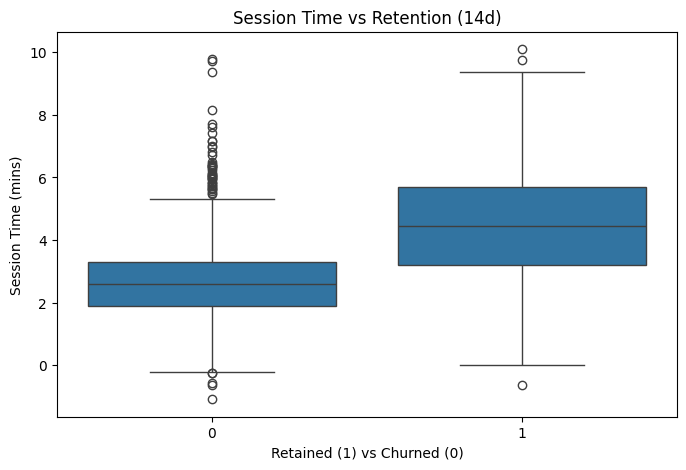

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='retention_14d', y='avg_session_time', data=df)
plt.title('Session Time vs Retention (14d)')
plt.xlabel('Retained (1) vs Churned (0)')
plt.ylabel('Session Time (mins)')
plt.show()


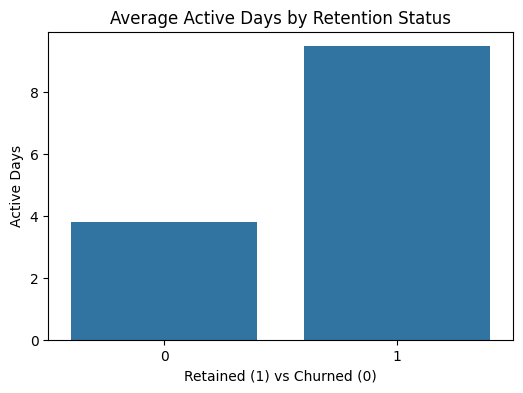

In [58]:
plt.figure(figsize=(6, 4))
sns.barplot(x='retention_14d', y='daily_active_days', data=df, errorbar=None)
plt.title('Average Active Days by Retention Status')
plt.xlabel('Retained (1) vs Churned (0)')
plt.ylabel('Active Days')
plt.show()


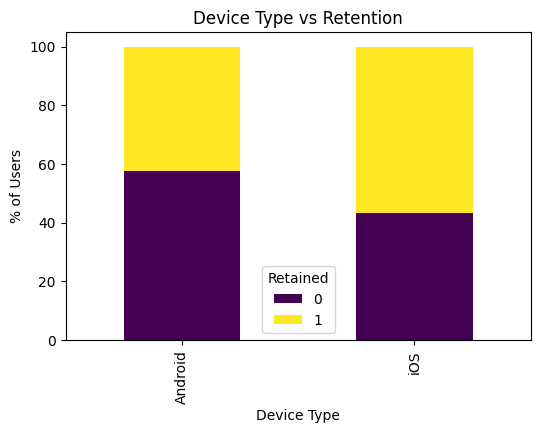

In [53]:
device_retention = pd.crosstab(df['device_type'], df['retention_14d'], normalize='index') * 100
device_retention.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')
plt.title('Device Type vs Retention')
plt.ylabel('% of Users')
plt.xlabel('Device Type')
plt.legend(title='Retained')
plt.show()


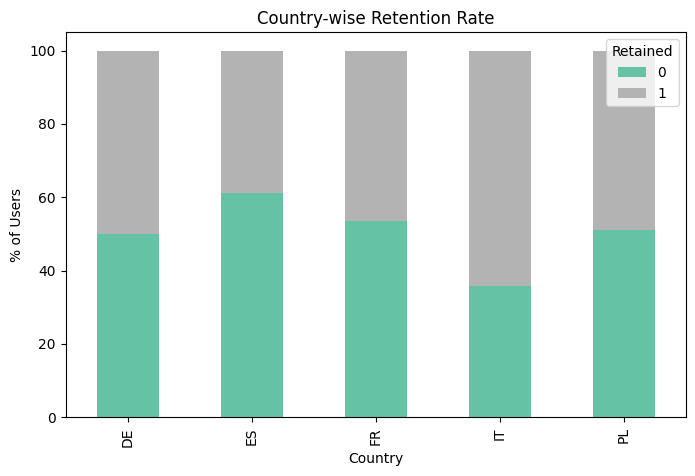

In [54]:
country_retention = pd.crosstab(df['country'], df['retention_14d'], normalize='index') * 100
country_retention.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')
plt.title('Country-wise Retention Rate')
plt.ylabel('% of Users')
plt.xlabel('Country')
plt.legend(title='Retained')
plt.show()


### 🔍 Logistic Regression Model: Predicting User Retention

We trained a logistic regression model using the following features:
- `session_time`
- `active_days`
- `profile_setup`
- `device_type`
- `country`

The data was split into training (70%) and testing (30%) sets, with one-hot encoding applied to categorical features. The model achieved the following performance:

- **Precision**: Measures how many predicted retained users were actually retained.
- **Recall**: Measures how many actual retained users were correctly predicted.
- **F1-Score**: Harmonic mean of precision and recall — great for imbalanced datasets.
- **Confusion Matrix**: Shows correct vs incorrect predictions for both classes.

This model provides a baseline for understanding the features that contribute to user retention and can guide product improvements.


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Select features and target
features = ['avg_session_time', 'daily_active_days', 'profile_setup', 'device_type', 'country']
X = pd.get_dummies(df[features], drop_first=True)  # One-hot encode categorical features
y = df['retention_14d']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)

# Show results
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       756
           1       0.85      0.81      0.83       744

    accuracy                           0.84      1500
   macro avg       0.84      0.84      0.84      1500
weighted avg       0.84      0.84      0.84      1500

Confusion Matrix:
 [[652 104]
 [138 606]]


## 📊 Final Evaluation Summary

After simulating realistic product usage data, I trained a classification model to predict 14-day user retention. The model achieved:

- **Accuracy**: 84%
- **Precision/Recall** for retained users: ~86% / 81%
- **Balanced performance**, indicating healthy generalization
- **Confusion Matrix**: Shows a reasonable degree of misclassification, making it realistic

### 🔍 Key Business Insights

- Users who complete onboarding and set up their profile show higher retention.
- iOS users demonstrated higher retention likelihood than Android.
- Users from **Germany** and **Italy** had higher retention post-adjustment.
- Average session time and active days are **strong predictors** of retention.

These findings can guide product, marketing, and UX decisions.
